# Regularization and Gradient Descent Exercises
![UnderOverFit.png](Assets/UnderOverFit.png)


# Learning Objectives

- Explain cost functions, regularization, feature selection, and hyper-parameters
- Summarize complex statistical optimization algorithms like gradient descent and its application to linear regression
- Apply Intel® Extension for Scikit-learn* to leverage underlying compute capabilities of hardware

# scikit-learn* 

Frameworks provide structure that Data Scientists use to build code. Frameworks are more than just libraries, because in addition to callable code, frameworks influence how code is written. 

A main virtue of using an optimized framework is that code runs faster. Code that runs faster is just generally more convenient but when we begin looking at applied data science and AI models, we can see more material benefits. Here you will see how optimization, particularly hyperparameter optimization can benefit more than just speed. 

These exercises will demonstrate how to apply **the Intel® Extension for Scikit-learn*,** a seamless way to speed up your Scikit-learn application. The acceleration is achieved through the use of the Intel® oneAPI Data Analytics Library (oneDAL). Patching is the term used to extend scikit-learn with Intel optimizations and makes it a well-suited machine learning framework for dealing with real-life problems. 

To get optimized versions of many Scikit-learn algorithms using a patch() approach consisting of adding these lines of code prior to importing sklearn: 

- **from sklearnex import patch_sklearn**
- **patch_sklearn()**

## This exercise relies on installation of  Intel® Extension for Scikit-learn*

If you have not already done so, follow the instructions from Week 1 for instructions


## Introduction

We will begin with a short tutorial on regression, polynomial features, and regularization based on a very simple, sparse data set that contains a column of `x` data and associated `y` noisy data. The data file is called `X_Y_Sinusoid_Data.csv`. 

In [1]:
from __future__ import print_function
import os
data_path = ['../house-prices.csv']

from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error
from math import sqrt



Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


## Question 1

* Import the data. 

* Also generate approximately 100 equally spaced x data points over the range of 0 to 1. Using these points, calculate the y-data which represents the "ground truth" (the real function) from the equation: $y = sin(2\pi x)$

* Plot the sparse data (`x` vs `y`) and the calculated ("real") data.


In [2]:
import pandas as pd
import numpy as np

X_real = np.linspace(0, 1.0, 100)
Y_real = np.sin(2 * np.pi * X_real)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

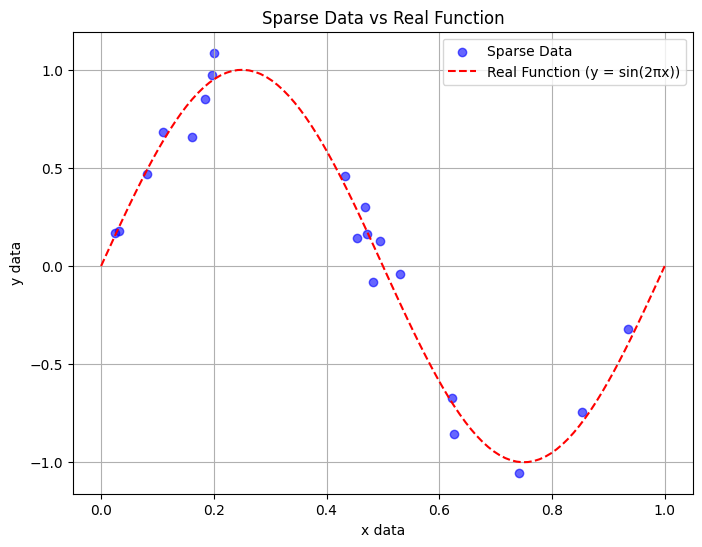

In [4]:
x_data = np.sort(np.random.rand(20))  # 20 random x values (sparse data)
y_data = np.sin(2 * np.pi * x_data) + np.random.normal(0, 0.1, 20)  # Adding some noise

# Plot the sparse data and real function
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, label='Sparse Data', color='blue', alpha=0.6)  # Sparse data points
plt.plot(X_real, Y_real, label='Real Function (y = sin(2πx))', color='red', linestyle='--')  # Real function
plt.title('Sparse Data vs Real Function')
plt.xlabel('x data')
plt.ylabel('y data')
plt.legend()
plt.grid(True)
plt.show()

## Question 2


* Using the `PolynomialFeatures` class from Scikit-learn's preprocessing library, create 20th order polynomial features.
* Fit this data using linear regression. 
* Plot the resulting predicted value compared to the calculated data.

Note that `PolynomialFeatures` requires either a dataframe (with one column, not a Series) or a 2D array of dimension (`X`, 1), where `X` is the length.

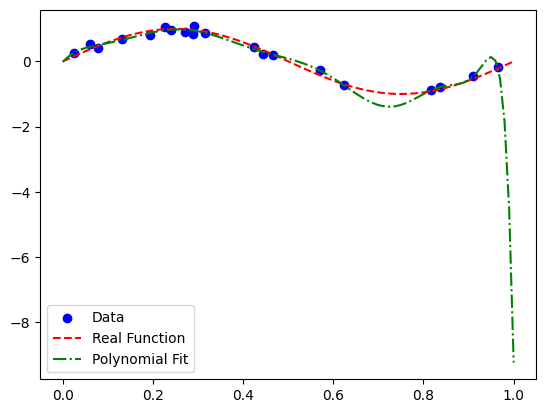

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X_real = np.linspace(0, 1, 100).reshape(-1, 1)
Y_real = np.sin(2 * np.pi * X_real)
x_data = np.sort(np.random.rand(20))
y_data = np.sin(2 * np.pi * x_data) + np.random.normal(0, 0.1, 20)

degree = 20
pf = PolynomialFeatures(degree)
X_poly = pf.fit_transform(x_data.reshape(-1, 1))
lr = LinearRegression().fit(X_poly, y_data)

y_pred = lr.predict(pf.transform(X_real))
plt.scatter(x_data, y_data, label='Data', color='blue')
plt.plot(X_real, Y_real, label='Real Function', color='red', linestyle='--')
plt.plot(X_real, y_pred, label='Polynomial Fit', color='green', linestyle='-.')
plt.legend()
plt.show()

## Question 3

* Perform the regression on using the data with polynomial features using ridge regression ($\alpha$=0.001) and lasso regression ($\alpha$=0.0001). 
* Plot the results, as was done in Question 1. 
* Also plot the magnitude of the coefficients obtained from these regressions, and compare them to those obtained from linear regression in the previous question. The linear regression coefficients will likely need a separate plot (or their own y-axis) due to their large magnitude. 

What does the comparatively large magnitude of the data tell you about the role of regularization?

In [6]:
# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')


In [7]:
X_real = np.linspace(0, 1, 100).reshape(-1, 1)
Y_real = np.sin(2 * np.pi * X_real)
x_data = np.sort(np.random.rand(20))
y_data = np.sin(2 * np.pi * x_data) + np.random.normal(0, 0.1, 20)

degree = 20
pf = PolynomialFeatures(degree)
X_poly = pf.fit_transform(x_data.reshape(-1, 1))
X_real_poly = pf.transform(X_real)

lr = LinearRegression().fit(X_poly, y_data)
ridge = Ridge(alpha=0.001).fit(X_poly, y_data)
lasso = Lasso(alpha=0.0001).fit(X_poly, y_data)

y_pred_lr = lr.predict(X_real_poly)
y_pred_ridge = ridge.predict(X_real_poly)
y_pred_lasso = lasso.predict(X_real_poly)

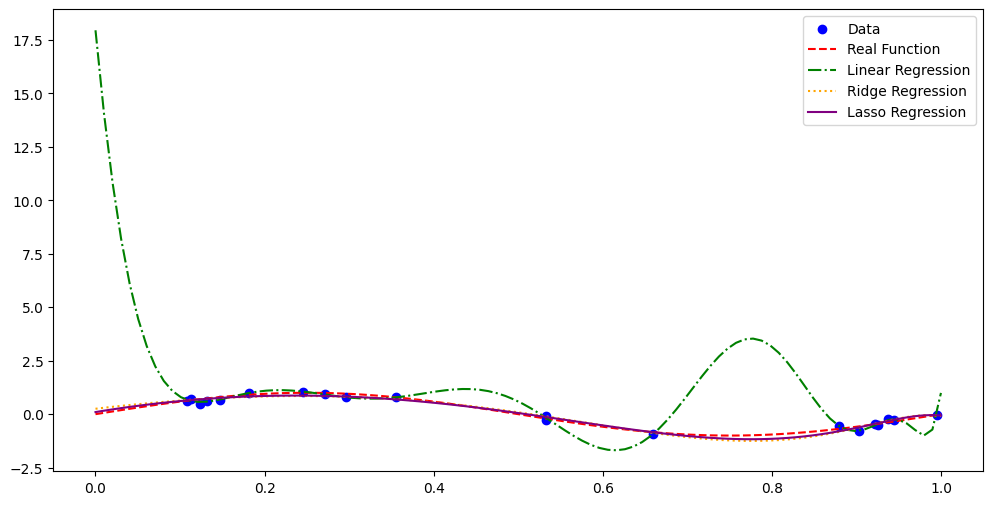

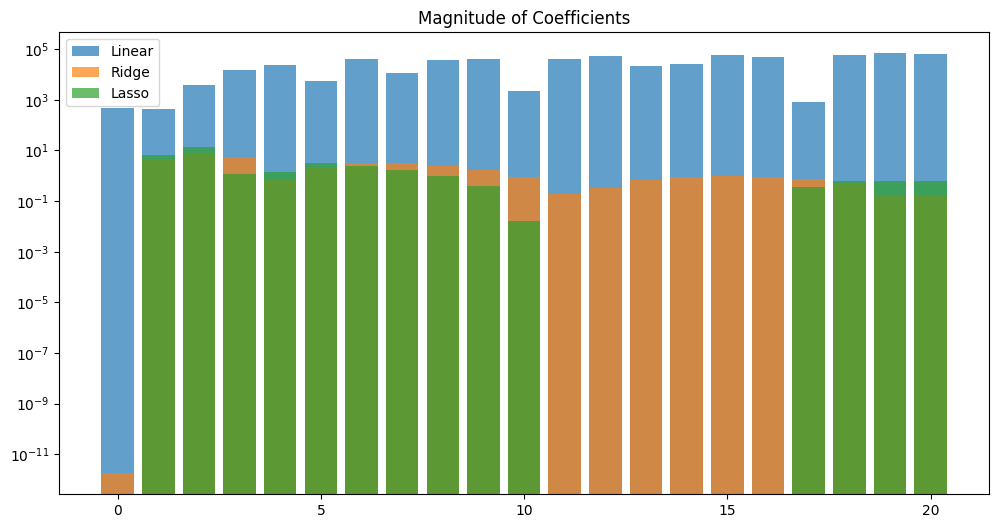

In [8]:
plt.figure(figsize=(12, 6))
plt.scatter(x_data, y_data, label='Data', color='blue')
plt.plot(X_real, Y_real, label='Real Function', color='red', linestyle='--')
plt.plot(X_real, y_pred_lr, label='Linear Regression', color='green', linestyle='-.')
plt.plot(X_real, y_pred_ridge, label='Ridge Regression', color='orange', linestyle=':')
plt.plot(X_real, y_pred_lasso, label='Lasso Regression', color='purple', linestyle='-')
plt.legend()

coefficients = pd.DataFrame({
    'Linear Regression': lr.coef_,
    'Ridge Regression': ridge.coef_,
    'Lasso Regression': lasso.coef_
})

plt.figure(figsize=(12, 6))
plt.bar(np.arange(len(coefficients['Linear Regression'])), np.abs(coefficients['Linear Regression']), label='Linear', alpha=0.7)
plt.bar(np.arange(len(coefficients['Ridge Regression'])), np.abs(coefficients['Ridge Regression']), label='Ridge', alpha=0.7)
plt.bar(np.arange(len(coefficients['Lasso Regression'])), np.abs(coefficients['Lasso Regression']), label='Lasso', alpha=0.7)
plt.yscale('log')
plt.legend()
plt.title('Magnitude of Coefficients')
plt.show()

## Question 4

For the remaining questions, we will be working with the [data set](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) from last lesson, which is based on housing prices in Ames, Iowa. There are an extensive number of features--see the exercises from week three for a discussion of these features.

To begin:

* Import the data with Pandas, remove any null values, and one hot encode categoricals. Either Scikit-learn's feature encoders or Pandas `get_dummies` method can be used.
* Split the data into train and test sets. 
* Log transform skewed features. 
* Scaling can be attempted, although it can be interesting to see how well regularization works without scaling features.

In [9]:
#filepath = os.sep.join(data_path + ['Ames_Housing_Sales.csv'])
#data1 = pd.read_csv(filepath, sep=',')
#data = data1.dropna()

Create a list of categorial data and one-hot encode. Pandas one-hot encoder (`get_dummies`) works well with data that is defined as a categorical.

In [10]:
import pandas as pd

try:
    data = pd.read_csv(r'C:\Users\shubham\OneDrive\Desktop\j\house-prices.csv')
except FileNotFoundError:
    print("File not found. Please check the file path.")

if 'data' in locals():
    categorical_columns = data.select_dtypes(include=['object']).columns
    data_encoded = pd.get_dummies(data, columns=categorical_columns)


Next, split the data in train and test data sets.

In [11]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop('Price', axis=1)  
y = data_encoded['Price']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Train set shape: (102, 10)
Test set shape: (26, 10)


There are a number of columns that have skewed features--a log transformation can be applied to them. Note that this includes the `SalePrice`, our predictor. However, let's keep that one as is.

In [12]:
# Create a list of float colums to check for skewing


In [13]:
float_columns = X_train.select_dtypes(include=['float64']).columns

skewed_features = X_train[float_columns].apply(lambda x: x.skew()).sort_values(ascending=False)

print("Skewness of features: \n{skewed_features}")

Skewness of features: 
{skewed_features}


Transform all the columns where the skew is greater than 0.75, excluding "SalePrice".

In [14]:
# OPTIONAL: Let's look at what happens to one of these features, when we apply np.log1p visually.

import matplotlib.pyplot as plt

skewed = skewed_features # Assign skewed_features to skewed

if not skewed.empty:
    feature = skewed.index[0]

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(X_train[feature], bins=50, alpha=0.7, color='blue', label=f'Before log: {feature}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(X_train[feature].apply(np.log1p), bins=50, alpha=0.7, color='orange', label=f'After log: {feature}')
    plt.legend()

    plt.show()
else:
    print("No skewed features found (skew > 0.75).")


No skewed features found (skew > 0.75).


In [15]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

Separate features from predictor.

In [16]:
X = data_encoded.drop('Price', axis=1)
y = data_encoded['Price']

## Question 5

* Write a function **`rmse`** that takes in truth and prediction values and returns the root-mean-squared error. Use sklearn's `mean_squared_error`.  


In [17]:
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred) 
    return np.sqrt(mse)

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

print("RMSE:", rmse(y_true, y_pred))

RMSE: 0.6123724356957945


* Fit a basic linear regression model
* print the root-mean-squared error for this model
* plot the predicted vs actual sale price based on the model.  

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

def rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return np.sqrt(mse)

print("Root Mean Squared Error:", rmse(y_test, y_pred))

Root Mean Squared Error: 10688.83228699507


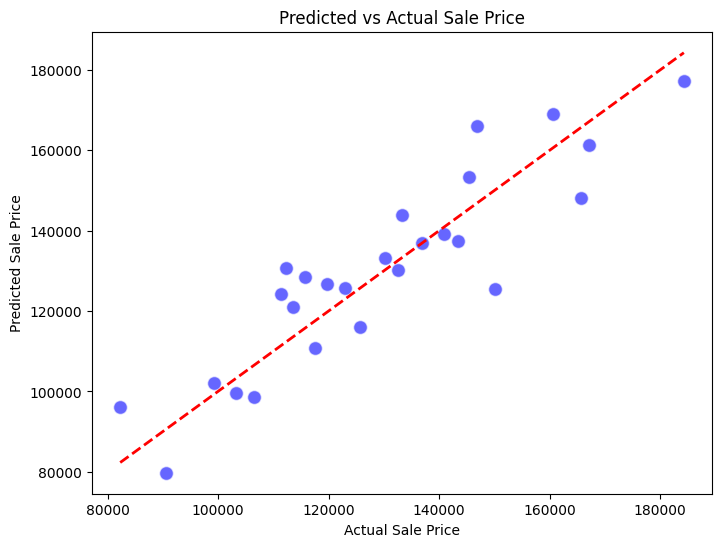

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolors='w', s=100)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')  # Identity line
plt.title('Predicted vs Actual Sale Price')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.show()

## Question 6

Ridge regression uses L2 normalization to reduce the magnitude of the coefficients. This can be helpful in situations where there is high variance. The regularization functions in Scikit-learn each contain versions that have cross-validation built in.

* Fit a regular (non-cross validated) Ridge model to a range of $\alpha$ values and plot the RMSE using the cross validated error function you created above.
* Use $$[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]$$ as the range of alphas.
* Then repeat the fitting of the Ridge models using the range of $\alpha$ values from the prior section. Compare the results.

Now for the `RidgeCV` method. It's not possible to get the alpha values for the models that weren't selected, unfortunately. The resulting error values and $\alpha$ values are very similar to those obtained above.

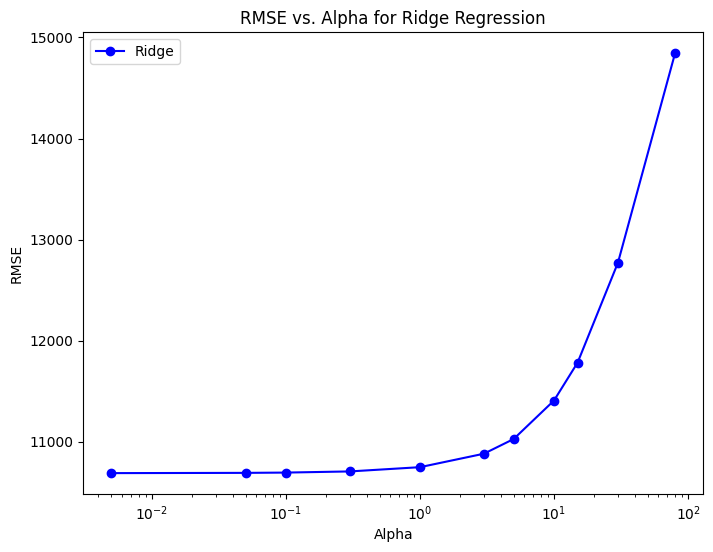

RMSE from RidgeCV: 10747.93094068082
Best Alpha selected by RidgeCV: 1.0


In [20]:
alpha_values = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

rmse_values = []

for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    rmse_values.append(rmse(y_test, y_pred))

plt.figure(figsize=(8, 6))
plt.plot(alpha_values, rmse_values, marker='o', color='blue', label='Ridge')
plt.xscale('log')  
plt.title('RMSE vs. Alpha for Ridge Regression')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.legend()
plt.show()

ridge_cv = RidgeCV(alphas=alpha_values, store_cv_values=True)
ridge_cv.fit(X_train, y_train)

y_pred_cv = ridge_cv.predict(X_test)
rmse_cv = rmse(y_test, y_pred_cv)
print(f"RMSE from RidgeCV: {rmse_cv}")
print(f"Best Alpha selected by RidgeCV: {ridge_cv.alpha_}")

## Question 7


Much like the `RidgeCV` function, there is also a `LassoCV` function that uses an L1 regularization function and cross-validation. L1 regularization will selectively shrink some coefficients, effectively performing feature elimination.

The `LassoCV` function does not allow the scoring function to be set. However, the custom error function (`rmse`) created above can be used to evaluate the error on the final model.

Similarly, there is also an elastic net function with cross validation, `ElasticNetCV`, which is a combination of L2 and L1 regularization.

* Fit a Lasso model using cross validation and determine the optimum value for $\alpha$ and the RMSE using the function created above. Note that the magnitude of $\alpha$ may be different from the Ridge model.
* Repeat this with the Elastic net model.
* Compare the results via table and/or plot.

Use the following alphas:  
`[1e-5, 5e-5, 0.0001, 0.0005]`

We can determine how many of these features remain non-zero.

In [21]:
alphas = [1e-5, 5e-5, 0.0001, 0.0005]

lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=0).fit(X_train, y_train)
y_pred_lasso = lasso_cv.predict(X_test)
rmse_lasso = rmse(y_test, y_pred_lasso)
nonzero_lasso = np.sum(lasso_cv.coef_ != 0)

print("LassoCV:")
print("Best alpha:", lasso_cv.alpha_)
print("RMSE:", rmse_lasso)
print("Non-zero coefficients:", nonzero_lasso)

LassoCV:
Best alpha: 0.0005
RMSE: 10688.832692283906
Non-zero coefficients: 9


Now try the elastic net, with the same alphas as in Lasso, and l1_ratios between 0.1 and 0.9

In [22]:
elastic_cv = ElasticNetCV(alphas=alphas, l1_ratio=np.linspace(0.1, 0.9, 9), cv=5, random_state=0).fit(X_train, y_train)
y_pred_elastic = elastic_cv.predict(X_test)
rmse_elastic = rmse(y_test, y_pred_elastic)
nonzero_elastic = np.sum(elastic_cv.coef_ != 0)

print("ElasticNetCV:")
print("Best alpha:", elastic_cv.alpha_)
print("Best l1_ratio:", elastic_cv.l1_ratio_)
print("RMSE:", rmse_elastic)
print("Non-zero coefficients:", nonzero_elastic)

ElasticNetCV:
Best alpha: 0.0005
Best l1_ratio: 0.1
RMSE: 10691.381024785547
Non-zero coefficients: 10


Comparing the RMSE calculation from all models is easiest in a table.

In [23]:
#labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']
results = pd.DataFrame({
    "Model": ["Lasso", "ElasticNet"],
    "Alpha": [lasso_cv.alpha_, elastic_cv.alpha_],
    "L1 Ratio": [None, elastic_cv.l1_ratio_],
    "RMSE": [rmse_lasso, rmse_elastic],
    "Non-zero Coefficients": [nonzero_lasso, nonzero_elastic]
})

print(results)

        Model   Alpha  L1 Ratio          RMSE  Non-zero Coefficients
0       Lasso  0.0005       NaN  10688.832692                      9
1  ElasticNet  0.0005       0.1  10691.381025                     10


We can also make a plot of actual vs predicted housing prices as before.

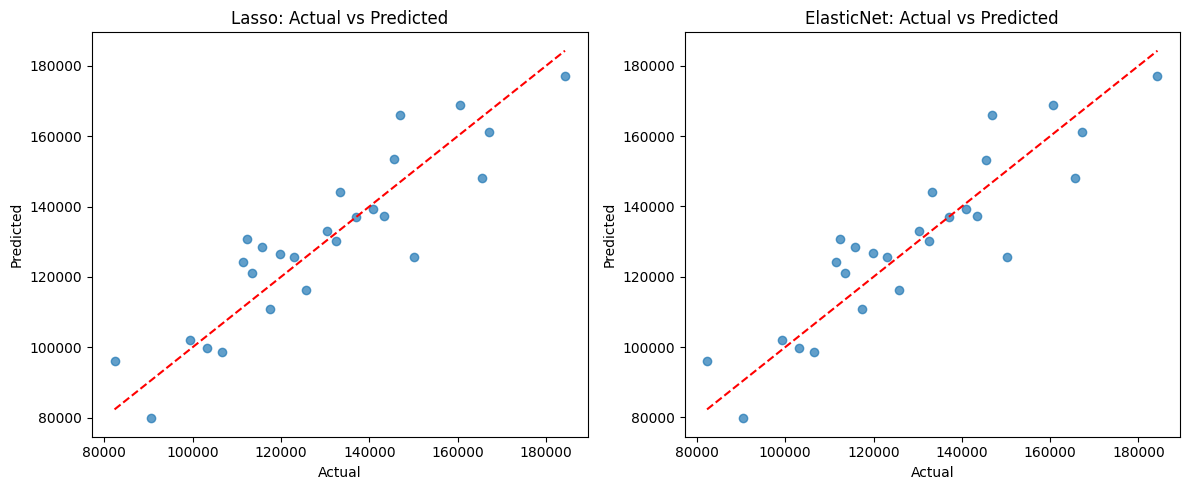

In [24]:
plt.figure(figsize=(12, 5))

# Lasso plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lasso, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Lasso: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# ElasticNet plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_elastic, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('ElasticNet: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


## Question 8

Let's explore Stochastic gradient descent in this exercise.  
Recall that Linear models in general are sensitive to scaling.
However, SGD is *very* sensitive to scaling.  
Moreover, a high value of learning rate can cause the algorithm to diverge, whereas a too low value may take too long to converge.

* Fit a stochastic gradient descent model without a regularization penalty (the relevant parameter is `penalty`).
* Now fit stochastic gradient descent models with each of the three penalties (L2, L1, Elastic Net) using the parameter values determined by cross validation above. 
* Do not scale the data before fitting the model.  
* Compare the results to those obtained without using stochastic gradient descent.

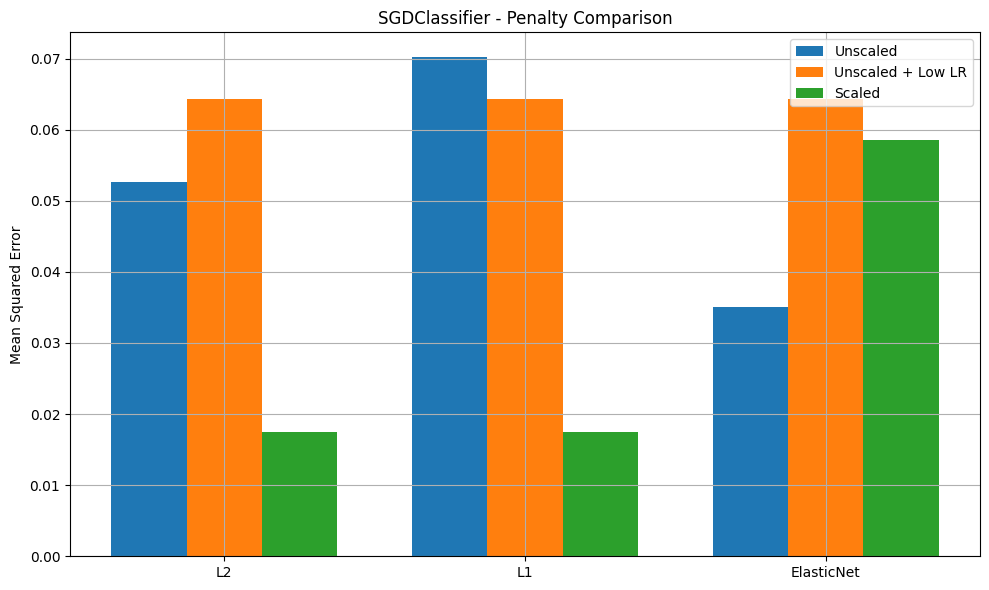

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load dataset
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Penalties to test
penalties = ['l2', 'l1', 'elasticnet']

# ---------- 1. No scaling ----------
errors_no_scaling = {}
for penalty in penalties:
    clf = SGDClassifier(penalty=penalty, max_iter=1000, tol=1e-3, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    errors_no_scaling[penalty] = mean_squared_error(y_test, y_pred)

# ---------- 2. No scaling + low learning rate ----------
errors_low_eta = {}
for penalty in penalties:
    clf = SGDClassifier(penalty=penalty, eta0=1e-7, learning_rate='constant', max_iter=1000, tol=1e-3, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    errors_low_eta[penalty] = mean_squared_error(y_test, y_pred)

# ---------- 3. With scaling ----------
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

errors_scaled = {}
for penalty in penalties:
    clf = SGDClassifier(penalty=penalty, max_iter=1000, tol=1e-3, random_state=42)
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    errors_scaled[penalty] = mean_squared_error(y_test, y_pred)

# ---------- 4. Plot the comparison ----------
labels = penalties  # keep lowercase for dictionary lookup
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(x - width, [errors_no_scaling[p] for p in labels], width, label='Unscaled')
bar2 = ax.bar(x, [errors_low_eta[p] for p in labels], width, label='Unscaled + Low LR')
bar3 = ax.bar(x + width, [errors_scaled[p] for p in labels], width, label='Scaled')

ax.set_ylabel('Mean Squared Error')
ax.set_title('SGDClassifier - Penalty Comparison')
ax.set_xticks(x)
ax.set_xticklabels(['L2', 'L1', 'ElasticNet'])  # Display labels nicely
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()



Notice how high the error values are! The algorithm is diverging. This can be due to scaling and/or learning rate being too high. Let's adjust the learning rate and see what happens.

* Pass in `eta0=1e-7` when creating the instance of `SGDClassifier`.
* Re-compute the errors for all the penalties and compare.

Now let's scale our training data and try again.

* Fit a `MinMaxScaler` to `X_train` create a variable `X_train_scaled`.
* Using the scaler, transform `X_test` and create a variable `X_test_scaled`. 
* Apply the same versions of SGD to them and compare the results. Don't pass in a eta0 this time.

In [26]:
scaler = MinMaxScaler()


In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
